<a href="https://colab.research.google.com/github/Migaalee/PAD/blob/main/tutorial_EDA_PAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Mining 2018/ 2019

## Data Exploration Tutorial



### Objectives

In these exercises you will explore some basic statistics and visualizations with a very popular benchmark dataset, the Anderson–Fisher Iris.
The Iris dataset consists of four real‐valued features used to predict which of three types of iris flower
was measured (a three‐class classification problem).

Specifically, Iris is a 150 by 4 data of three taxa:
Specimen (1‐150)       Taxon

-   1‐50               Iris setosa (diploid)
-  51‐100              Iris versicolor (tetraploid)
- 101‐150              Iris virginica (hexaploid)

Features:

- W1 Sepal length
- W2 Sepal width
- W3 Petal length
- W4 Petal width

You can read about these data at https://archive.ics.uci.edu/ml/datasets/iris  

### Setup

During this tutorial we will make use the following libraries:

In [ ]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

### Load dataset

First, download and load the Anderson–Fisher Iris dataset into Python.

In [ ]:
# load the text file
data = np.loadtxt('iris.txt') 
print('Dataset type is', type(data).__name__)

Dataset type is ndarray


A short inspection of the data file shows:  
    - The data is tabular, whitespace separated
    - No header row
    - No index column
    - Four features are all numerical continous whereas the Class feature (last one) is categorical.  

Thus, given the conditions, one valid option would be to load the data into Python using the Numpy library.  
Another option would be to use the Pandas library since we will be dealing mostly with data manipulation, summarization and visualization.

In [ ]:
# IPython 'magic' command 
# show current ndarray type objects in memory and respective information
%whos ndarray 

Variable   Type       Data/Info
-------------------------------
data       ndarray    150x5: 750 elems, type `float64`, 6000 bytes


In [ ]:
# show current objects in memory and respective information
%whos 

Variable   Type       Data/Info
-------------------------------
data       ndarray    150x5: 750 elems, type `float64`, 6000 bytes
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module     <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module     <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


Find out more about IPython *magic* commands at http://ipython.readthedocs.io/en/stable/interactive/magics.html

## Exercises

### Exercise  1###
**I)** 
- Analyse the format of your data set. 
- Get the number of features and the number of data points. 
- Separate the original data into target (i.e. class) values and the rest of the features.  

Numpy arrays store information intrinsic to the array itself and we can check it through its attributes.  

In [ ]:
print('Dataset shape:', data.shape)
print('Dataset has', data.shape[0],'data points and', data.shape[1], 'features.')
print("Dataset number of array dimensions: ", data.ndim)
print("Dataset number of elements: ", data.size)
print("Dataset elements type:", data.dtype)
print("Dataset elements size:", data.itemsize, "bytes")
print("Dataset size:", data.nbytes, "bytes")

Dataset shape: (150, 5)
Dataset has 150 data points and 5 features.
Dataset number of array dimensions:  2
Dataset number of elements:  750
Dataset elements type: float64
Dataset elements size: 8 bytes
Dataset size: 6000 bytes


More information at
https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#array-attributes

#### First glances into the data

If we check the first 5 rows of dataset we can see that the target (i.e. class) is on the last column.

In [ ]:
print(data[:5])

[[5.1 3.5 1.4 0.2 1. ]
 [4.9 3.  1.4 0.2 1. ]
 [4.7 3.2 1.3 0.2 1. ]
 [4.6 3.1 1.5 0.2 1. ]
 [5.  3.6 1.4 0.2 1. ]]


In [ ]:
# Get class attribute
data_class = data[:,-1].astype(int)

# Remove class attribute from 'data'
data = data[:,:-1]

**II)** 
- Construct a vector with the values of the second feature (‘Sepal Width’). 
- Plot a histogram of this feature values and interpret it.  

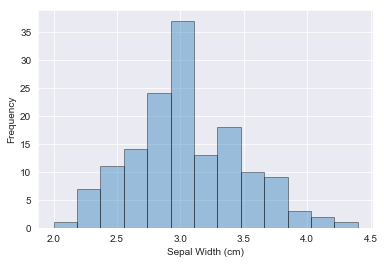

In [ ]:
ax = sns.distplot(data[:,1], # data for plotting
             kde=False, # Whether to plot a gaussian kernel density estimate.
             hist_kws=dict(edgecolor="k"), # Add edge color to aid visualization
             norm_hist = False); # ... 

# Properly label axis
ax.set(xlabel='Sepal Width (cm)', 
       ylabel='Frequency');

Seaborn's *distplot* returns an axis object in which we can manipulate the axis labels.  
Seaborn's *distplot* at https://seaborn.pydata.org/generated/seaborn.distplot.html

**III)** 
- Construct 2 plots of the feature 'Sepal Length' (1st feature)
    + A histogram with 10  bins
    + A histogram with  20  bins
- Produce one more histogram of the whole dataset and plot it.  
  
  
The simplest way to display several plots in the same figure is to use Matplotlib *subplots*.  
*Subplots* returns an array of axis and we can pass each axis object to Seaborn to specify in which subplot we want to plot.

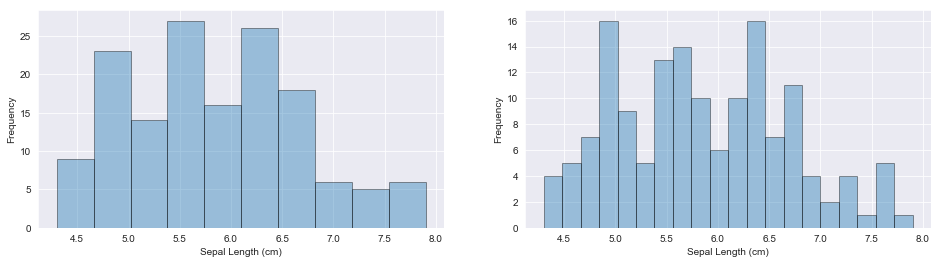

In [ ]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 4)) # size of the whole figure

sns.distplot(data[:,0], 
             ax=axs[0], # choose the subplot for the plot
             kde=False, 
             hist_kws=dict(edgecolor="k"), 
             norm_hist = False,
             bins = 10) # choose the number of bins  
axs[0].set(xlabel='Sepal Length (cm)', 
           ylabel='Frequency')

sns.distplot(data[:,0], 
             ax=axs[1], 
             kde=False, 
             hist_kws=dict(edgecolor="k"), 
             norm_hist = False, 
             bins = 20)
axs[1].set(xlabel='Sepal Length (cm)', 
           ylabel='Frequency');

If we pass the whole multidimensional array to *distplot*, it will create a side-by-side histogram of all of the variables.

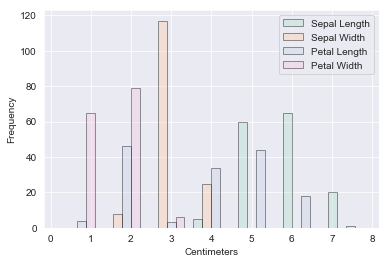

In [ ]:
ax = sns.distplot(data, 
                 kde=False, 
                 hist_kws=dict(color = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4'], # Use http://colorbrewer2.org
                               edgecolor="k"), 
                 norm_hist = False,
                 label=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
ax.set(xlabel='Centimeters', 
       ylabel='Frequency')

plt.legend();

Subplots with matplotlib at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

**IV)**

- Compute the mean and the standard deviation of your data for each feature.

In [ ]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

print('Mean:', np.round(means,3))
print('Standard deviation:', np.round(stds,3))

Mean: [5.843 3.057 3.758 1.199]
Standard deviation: [0.825 0.434 1.759 0.76 ]


Operations over numpy arrays https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#array-methods

**V)**

- Compute a scatter plot graphic of the first two features of the data.  

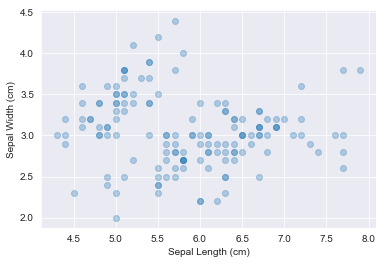

In [ ]:
ax = sns.regplot(x=data[:,0], 
                 y=data[:,1], 
                 fit_reg=False, # By default, a linear regression fit is drawn
                 scatter_kws={'alpha':0.3}) # Transparency 
ax.set(xlabel='Sepal Length (cm)', 
       ylabel='Sepal Width (cm)');

Scatter plot  
https://python-graph-gallery.com/40-basic-scatterplot-seaborn/

Transparency indirectly allows to see the density of dots on each part of the scatterplot  
https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/

### Exercise  2 ### 

- Plot the complete data set by their two first features, using the class value to select the color.  


You can create a Pandas Dataframe using the numpy array and set the features names for each column in the data matrix. 

In [ ]:
column_names = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
df = pd.DataFrame(data, columns=[x.lower().replace(' ','_') for x in column_names])

We can also add the target class to the pandas dataframe which will make the plotting easier.

In [ ]:
df['class'] = data_class

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


df.dtypes

In [ ]:
df.shape

(150, 5)

With a Pandas Dataframe we can now use the *lmplot* method from Seaborn which allows to do a scatter plot and set a color to each data point according to another feature in the data.  
https://python-graph-gallery.com/43-use-categorical-variable-to-color-scatterplot-seaborn/

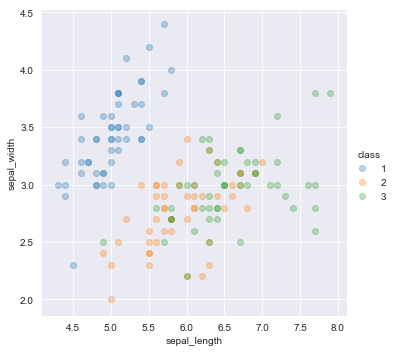

In [ ]:
sns.lmplot(x="sepal_length", 
           y="sepal_width", 
           hue="class", # Use the 'hue' argument to provide a factor variable
           data=df,
           fit_reg=False,
           scatter_kws={'alpha':0.3}); 

### Exercise  3### 

**I)** 
- Normalize the data set by z-score and by range. 


Recalling both normalization formulas we have:

$Z = \frac{X-\bar{X}}{S_X}, \qquad
Z = \frac{X-\min(X)}{\max(X)-\min(X)}$

There are multiple ways to scale the data given the structures we are working with. 
You may consult common pre-defined functions available at  Scikit-Learn
 
    http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling  


In [ ]:
### 1.
#1.1 Using the previously defined means and standard deviations
# Normalize by z-score only the 1st feature
zscores_sepal_length = (data[:,0] - means[0]) / stds[0]

# Normalize by z-score all of the features
z_scores = (data - means) / stds

#1.2 Making use of numpy methods
# Normalize by range all of the features
z_range = (data - data.min(axis=0)) / data.ptp(axis=0) # Peak to peak (maximum - minimum) value along a given axis.


### 2.
df_zscores = (df - df.mean()) / df.std()
df_z_range = (df - df.min()) / (df.max() - df.min()) # there is no "Peak to peak" method for Pandas Dataframes


### 3.
from sklearn import preprocessing

zscore_scaler = preprocessing.StandardScaler().fit(data)
z_scores = zscore_scaler.transform(data)

zrange_scaler = preprocessing.MinMaxScaler().fit(data)
z_range = zrange_scaler.transform(data)

**II)** Compute a box‐plot graphic of your data before and after normalization. Compare the results.

To make a boxplot with all of the features there are at least two options.  
1. Melt the dataframe (or numpy array) to one single column and add a second column specifying the name of the feature. Then apply boxplot by group.
https://seaborn.pydata.org/generated/seaborn.boxplot.html
2. You may use the Pandas Dataframe boxplot function. 
Pandas as several visualization methods to avoid systematic code repetition to intuitive data visualizations on a dataframe.  
https://pandas.pydata.org/pandas-docs/stable/visualization.html


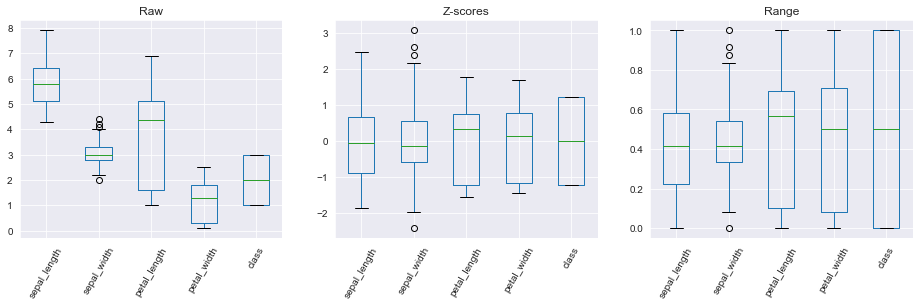

In [ ]:
fig, axs = plt.subplots(ncols=3, 
                        figsize=(16, 4)) 

df.plot.box(ax=axs[0], # use the ax argument to specify the subplot
            rot=60, # rotate the x axis by some degree, useful for long feature names
            title='Raw') # set a title for each suplot to ease reading

df_zscores.plot.box(ax=axs[1], rot=60, title='Z-scores')
df_z_range.plot.box(ax=axs[2], rot=60, title='Range');